In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': [8,5]})

In [7]:
from differential_value_iteration.environments.environments import mrp1
from differential_value_iteration.algorithms.algorithms import RVI_Evaluation, DVI_Evaluation
from differential_value_iteration.utils import run_alg

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
env = mrp1

### Synchronous RVI (sRVI) on the 3-loop problem

RVI Evaluation starting alpha:1.0 Converged? False
RVI Evaluation starting alpha:0.999 Converged? True
RVI Evaluation starting alpha:0.99 Converged? True
RVI Evaluation starting alpha:0.9 Converged? True
RVI Evaluation starting alpha:0.7 Converged? True
RVI Evaluation starting alpha:0.5 Converged? True
RVI Evaluation starting alpha:0.3 Converged? True
RVI Evaluation starting alpha:0.1 Converged? True
RVI Evaluation starting alpha:0.01 Converged? True
RVI Evaluation starting alpha:0.001 Converged? True


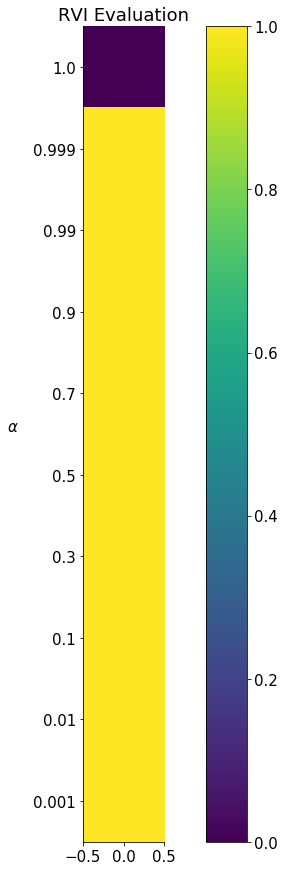

In [9]:
alphas = [1.0, 0.999, 0.99, 0.9, 0.7, 0.5, 0.3, 0.1, 0.01, 0.001]
max_iters = 50000
epsilon = 0.001

init_v = np.zeros(env.num_states())
init_r_bar_scalar = 0
convergence_flags = np.zeros(alphas.__len__())
for i, alpha in enumerate(alphas):
    alg = RVI_Evaluation(env, init_v, alpha, ref_idx=0)
    print(f'RVI Evaluation starting alpha:{alpha}', end=' ')
    convergence = run_alg(alg, 'exec_sync', max_iters, epsilon)
    print(f'Converged? {convergence}')
    convergence_flags[i] = convergence

plt.figure(figsize=(15, 15))
plt.yticks(np.arange(alphas.__len__()), alphas)
plt.ylabel(r'$\alpha$', rotation=0, labelpad=20)
results = np.array([convergence_flags]).reshape(-1, 1)
plt.imshow(results, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.clim(0, 1)
plt.title('RVI Evaluation')
plt.show()
plt.close()

For $\alpha=1$, sRVI does not converge on the (periodic) 3-loop problem.

### Synchronous DVI (sDVI) on the 3-loop problem

In [10]:
betas = [1.0, 0.999, 0.99, 0.9, 0.7, 0.5, 0.3, 0.1, 0.01, 0.001]

convergence_flags = np.zeros((alphas.__len__(), betas.__len__()))
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        alg = DVI_Evaluation(env, init_v, init_r_bar_scalar, alpha, beta)
        print(f'DVI Evaluation starting alpha:{alpha} beta:{beta}', end=' ')
        convergence = run_alg(alg, 'exec_sync', max_iters, epsilon)
        print(f'Converged? {convergence}')
        convergence_flags[i][j] = convergence

DVI Evaluation starting alpha:1.0 beta:1.0 

/Users/yiwan/Desktop/playground/differential-value-iteration/src/differential_value_iteration/utils.py:25: RuntimeWarning: overflow encountered in double_scalars
  if np.sum(np.abs(old_v - alg.v)) + r_bar_error < epsilon:
/Users/yiwan/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/yiwan/Desktop/playground/differential-value-iteration/src/differential_value_iteration/algorithms/algorithms.py:83: RuntimeWarning: invalid value encountered in double_scalars
  self.r_bar += self.beta * np.sum(delta)


Converged? False
DVI Evaluation starting alpha:1.0 beta:0.999 Converged? False
DVI Evaluation starting alpha:1.0 beta:0.99 Converged? False
DVI Evaluation starting alpha:1.0 beta:0.9 Converged? False
DVI Evaluation starting alpha:1.0 beta:0.7 Converged? False
DVI Evaluation starting alpha:1.0 beta:0.5 Converged? False
DVI Evaluation starting alpha:1.0 beta:0.3 Converged? False
DVI Evaluation starting alpha:1.0 beta:0.1 Converged? False
DVI Evaluation starting alpha:1.0 beta:0.01 Converged? False
DVI Evaluation starting alpha:1.0 beta:0.001 Converged? False
DVI Evaluation starting alpha:0.999 beta:1.0 Converged? False
DVI Evaluation starting alpha:0.999 beta:0.999 Converged? False
DVI Evaluation starting alpha:0.999 beta:0.99 Converged? False
DVI Evaluation starting alpha:0.999 beta:0.9 Converged? False
DVI Evaluation starting alpha:0.999 beta:0.7 Converged? False
DVI Evaluation starting alpha:0.999 beta:0.5 Converged? True
DVI Evaluation starting alpha:0.999 beta:0.3 Converged? True
DV

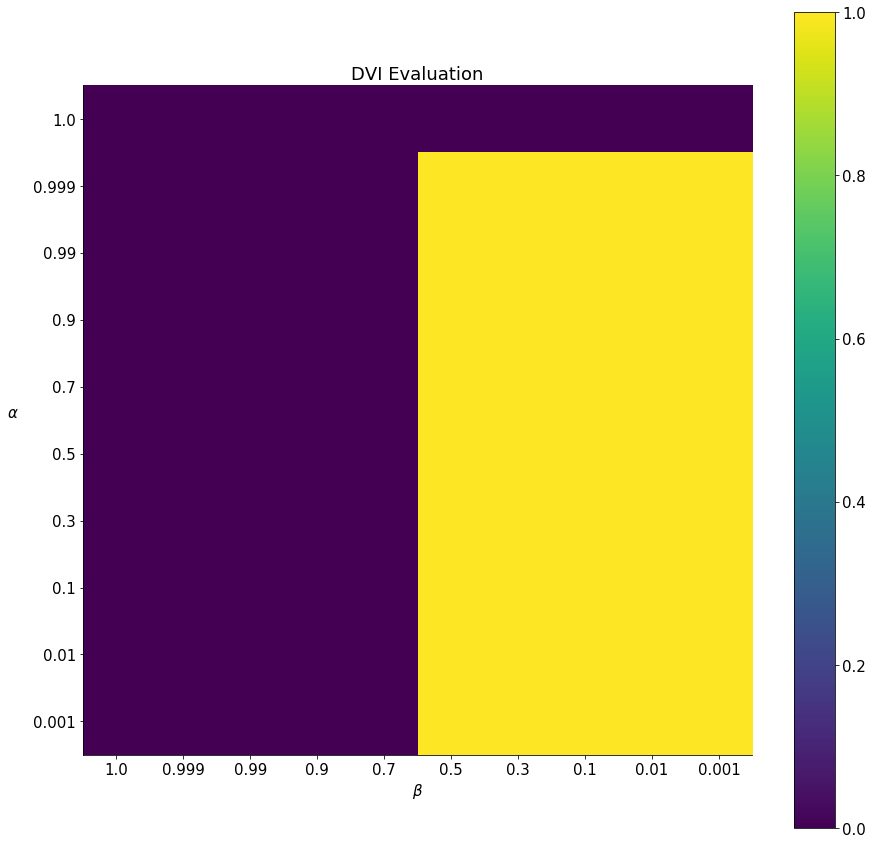

In [11]:
plt.figure(figsize=(15, 15))
plt.yticks(np.arange(alphas.__len__()), alphas)
plt.ylabel(r'$\alpha$', rotation=0, labelpad=20)
plt.xlabel(r'$\beta$')
plt.xticks(np.arange(betas.__len__()), betas)
plt.imshow(convergence_flags, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.clim(0, 1)
plt.title('DVI Evaluation')
plt.show()
plt.close()

If $\alpha=1$, sDVI does not converge for any value of $\beta$ on the (periodic) 3-loop problem.